In [1]:
library(tidyverse)
library(Seurat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject



In [2]:
celltypeColors = c(
"mitosis"="#bebebe","blood"="#ff9400",
"ExE endoderm"="#fec44f", "ExE ectoderm"="#cab2d6","early neurons"="#1F62A6", "mix late mesenchyme"="#BD342F",
"epiblast and PS"="#addd8e",
#neural
"neural ectoderm"="#AECBE6","NMP"="#96B9DB","neural tube"="#7EA8D0","notochord"="#6696C6","radial glias"="#4F85BB","oligodendrocytes and progenitors"="#3773B1","schwann cell precursors"="#08519C",
#mesodermal
"early mesoderm"="#FC9272","ExE mesoderm"="#EF7F64","early mesenchyme"="#E36C57","intermediate mesoderm"="#D6594A", "myocytes"="#CA473C",
"endoderm"="#fe9929","epithelial cells"="#fa9fb5")

cellcyclecolors = c("G0"="#762a83","G1"="#c2a5cf","Early-S"="#99d8c9","Mid-S"="#66c2a4","Late-S"="#41ae76","G2"="#238b45","M"="#ea6e34")

hires <- readRDS("/shareb/zliu//analysis/hires_mouse_dev/hires_mouse_emb_dev.new.rds")

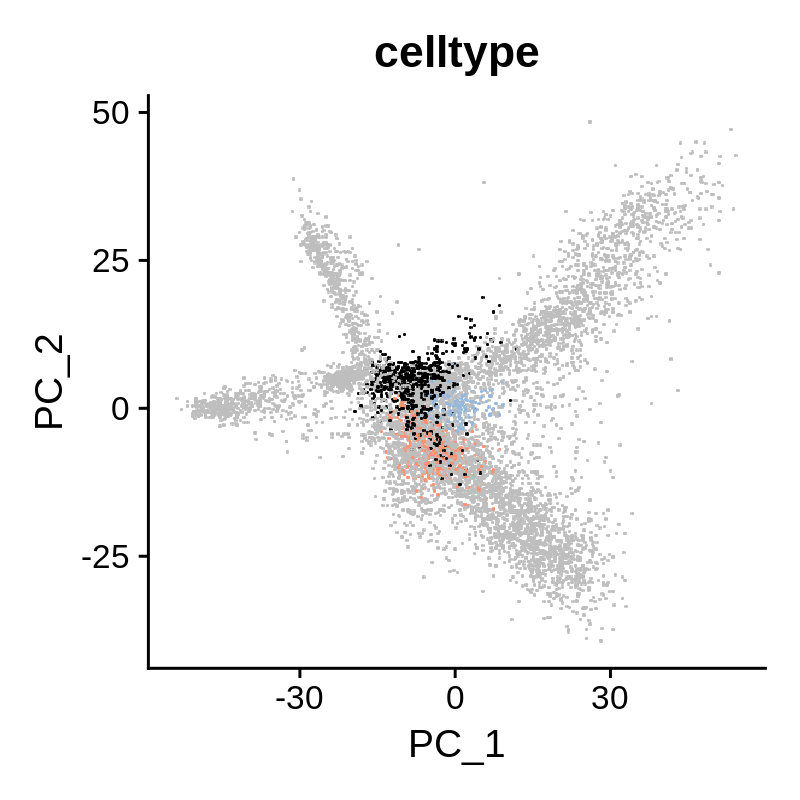

In [47]:
highlightColors = c(
"mitosis"="#000000","blood"="#bebebe",
"ExE endoderm"="#bebebe", "ExE ectoderm"="#bebebe","early neurons"="#bebebe", "mix late mesenchyme"="#bebebe",
"epiblast and PS"="#bebebe",
#neural
"neural ectoderm"="#bebebe","NMP"="#96B9DB","neural tube"="#bebebe","notochord"="#bebebe","radial glias"="#bebebe","oligodendrocytes and progenitors"="#bebebe","schwann cell precursors"="#bebebe",
#mesodermal
"early mesoderm"="#FC9272","ExE mesoderm"="#bebebe","early mesenchyme"="#bebebe","intermediate mesoderm"="#bebebe", "myocytes"="#bebebe",
"endoderm"="#bebebe","epithelial cells"="#bebebe")

options(repr.plot.width=4,repr.plot.height=4,repr.plot.res=200)
DimPlot(hires,group.by = "celltype",reduction = "pca",cols = highlightColors,raster = T) + NoLegend()

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from cpg_umap_ to cpgumap_”
Warning message:
“Cannot add objects with duplicate keys (offending key: cpgumap_) setting key to original value 'cpg_umap_'”


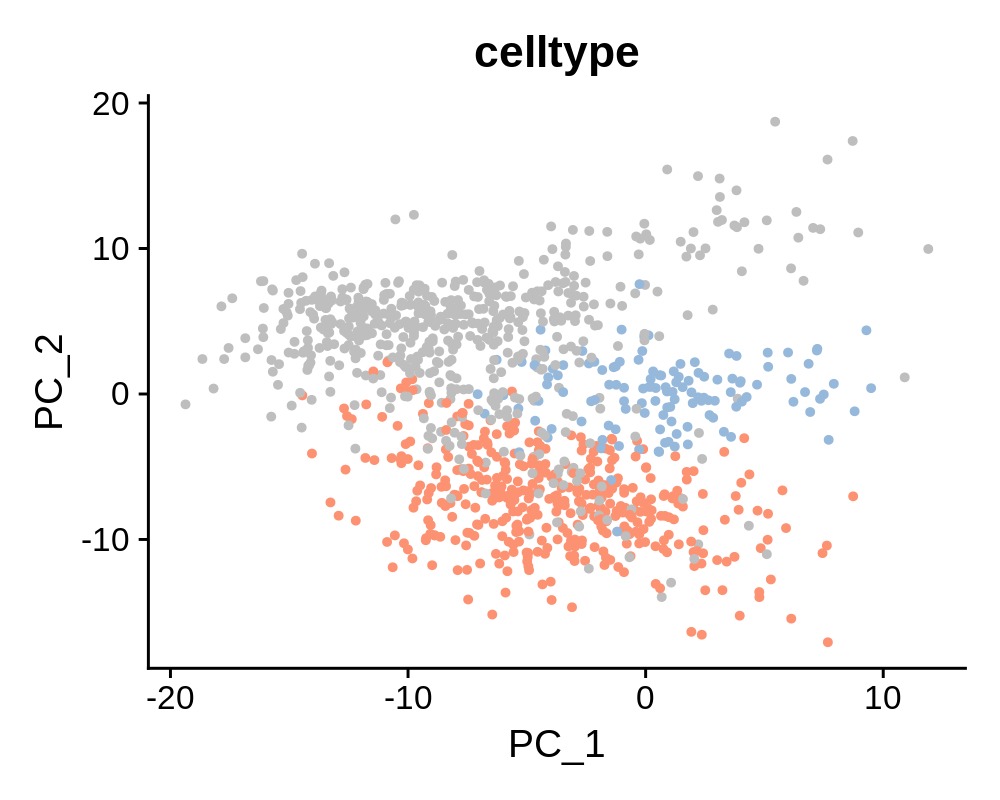

In [64]:
subset_hires <- subset(hires,subset = celltype %in% c("early mesoderm","NMP","mitosis"))
DimPlot(subset_hires,group.by = "celltype",reduction = "pca",cols = celltypeColors) + NoLegend()

In [6]:
# calculate average expression of each cell type
RNA_matrix <- hires[["SCT"]]@data %>% as.matrix()
RNA_matrix %>% t() %>% as.data.frame() %>% rownames_to_column("cellname") -> RNA_matrix
RNA_matrix %>% left_join(hires[[]] %>% select(cellname,celltype)) -> RNA_matrix

Joining, by = "cellname"


In [8]:
RNA_matrix %>% select(-cellname) %>% group_by(celltype) %>% summarise_all(mean) -> celltype_avg

In [ ]:
# hierarchical clustering and plot celltype_avg
celltype_avg %>% t() %>% as.data.frame() %>% rownames_to_column("gene") -> celltype_avg
celltype_avg %>% select(-gene) %>% as.matrix() -> celltype_avg
celltype_avg %>% dist() %>% hclust() %>% as.dendrogram() %>% plot(hang=-1) -> celltype_hclust


In [69]:
# hierarchical clustering and plot on PCA space for each celltype
hires@reductions$pca@cell.embeddings %>% as.data.frame() %>% rownames_to_column("cellname") %>% select(1:51) -> rna_pca_embedding
hires[[]] %>% select(cellname,celltype) -> celltype
rna_pca_embedding %>% left_join(celltype) -> rna_pca_embedding
rna_pca_embedding %>% select(-cellname) %>% group_by(celltype) %>% summarise_all(mean)%>% column_to_rownames("celltype") -> celltype_avg_pca

Joining, by = "cellname"


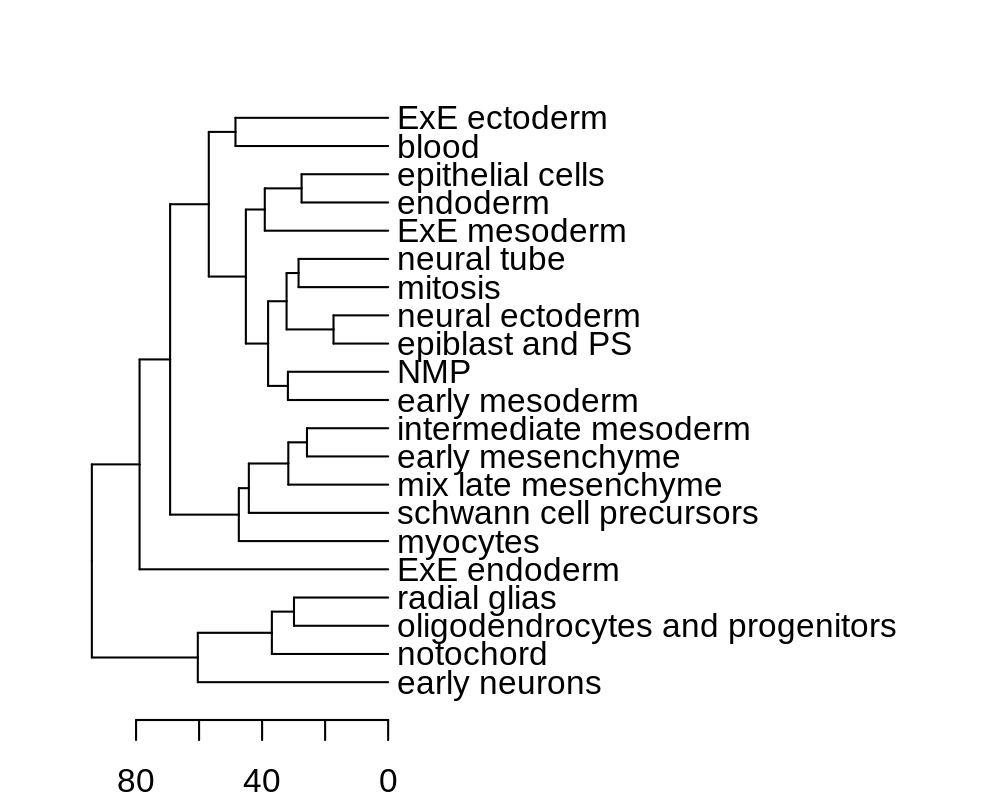

In [70]:
options(repr.plot.height = 4,repr.plot.width = 5,repr.plot.res = 200)
set.seed(42)
par(mar=c(2,2,2,15))
celltype_avg_pca %>% dist() %>% hclust(method = "ward.D2") %>% as.dendrogram() %>% plot(horiz = T) 